In [40]:
#Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score


import warnings
warnings.filterwarnings("ignore")

In [41]:
## let's load our dataset
df=pd.read_csv('C:/Users/Aabha Gupta/Downloads/workbench-dataset/creditcard.csv')

In [42]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Check Distribution of **Class**

In [43]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

from the above, we can see that most of the transactions are non-fruadulent transactions while only a few are fraudulent transactions.

This is a clear example of data imbalance. If we try to build a model on this dataset without dealing with the imbalance of the classes(fraud and non-fraud transactions), our model will end up memorising and predicting the non-fraud transactions, as it will try to figure out that in this case the best scenario to get a higher accuracy is to predict the non-fraudulent transactions.

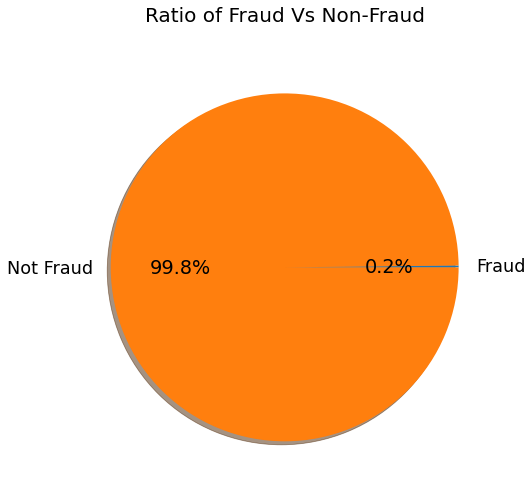

In [44]:
fraud =len(df[df['Class']==1])
notfraud = len(df[df['Class']==0])

# Data to plot
labels = 'Fraud','Not Fraud'
sizes = [fraud,notfraud]

# Plot
plt.figure(figsize=(10,8))
plt.pie(sizes, labels=labels,
autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Ratio of Fraud Vs Non-Fraud\n', fontsize=20)
sns.set_context("paper", font_scale=2)

<br>

**Let's try to build a model on the imbalance dataset and see our result**

In [45]:
pd.isnull(df).sum() > 0

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [46]:
df = df.dropna(how='any',axis=0) 

In [47]:
pd.isnull(df).sum() > 0

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

### Preparing our data for Model Building

In [48]:
# Separating data into Dependent and Independent Variables
y = df['Class']
X = df.drop('Class', axis=1)

In [49]:
# split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [50]:
#concatenate our training data back together
X = pd.concat([X_train, y_train], axis = 1)
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
264873,161634.0,-0.395578,1.489129,-0.833442,-0.224271,0.369444,-1.453886,0.796593,-0.060403,0.338270,...,0.231624,0.955194,-0.172092,-0.041050,-0.313444,-0.174301,0.064657,-0.036960,2.74,0
163821,116237.0,1.950487,0.002312,-1.761814,1.232470,0.523175,-0.650657,0.504231,-0.200857,0.116805,...,0.086306,0.326297,-0.068839,-0.416589,0.426044,-0.486299,-0.031266,-0.072543,38.44,0
72083,54557.0,1.105167,-0.166253,0.569520,0.681043,-0.259189,0.642792,-0.437034,0.356746,0.441417,...,0.009073,0.293023,-0.028688,-0.242206,0.389813,0.482852,0.010705,-0.008399,1.00,0
196949,131771.0,1.805238,0.961264,-1.717212,4.094625,0.938666,-0.227785,0.152911,0.066753,-1.073784,...,-0.137875,-0.450959,0.098530,-0.662272,-0.150154,-0.098852,-0.000030,0.017622,37.89,0
126213,77959.0,0.835421,-1.191847,0.578455,0.586101,-1.236663,0.194617,-0.532404,0.061561,-0.734344,...,-0.072349,-0.109154,-0.308356,0.011968,0.461350,-0.244810,0.031845,0.060910,237.00,0


#### Using Dummy Classifier to verify the inbalance data output

In [51]:
#DummyClassifier will end up prediciting only target 0

dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

In [52]:
# checking unique labels
print('Unique predicted lablels:', np.unique(dummy_pred))

# checking accuracy
print('Test score:', accuracy_score(y_test, dummy_pred))

Unique predicted lablels: [0]
Test score: 0.9981461194910255


### Upsampling

In [53]:
# separate minority and majority classes
from sklearn.utils import resample

not_fraud = df[df.Class==0]
fraud = df[df.Class==1]

# upsample minority
fraud_upsampled = resample(fraud,#==87
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), #===23235, # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.Class.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [54]:
# trying logistic regression with the balanced dataset

from sklearn.linear_model import LogisticRegression

y_train = upsampled.Class
X_train = upsampled.drop('Class', axis=1)
upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)
upsampled_pred = upsampled.predict(X_test)

In [55]:
# Checking accuracy
accuracy_score(y_test, upsampled_pred)

0.9743967866071178

In [56]:
from sklearn.metrics import classification_report
print('Logistic Regression classification_report')
print('.....'*10)
print(classification_report(y_test,upsampled_pred))

Logistic Regression classification_report
..................................................
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     71070
           1       0.06      0.88      0.11       132

    accuracy                           0.97     71202
   macro avg       0.53      0.93      0.55     71202
weighted avg       1.00      0.97      0.99     71202



In [57]:
# confusion matrix
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, upsampled_pred))

,0,1
0,69263,1807
1,16,116


## **DownSampling/UnderSampling**

In undersampling, we decrease the number of samples in the majority class to match the number of samples of the minority class.

That's we take the majority class and try to create new samples that match the length of the minority samples.

**Implementation Using Resample**

In [58]:
# still using our separated classes fraud and not_fraud from above

not_fraud = df[df.Class==0]
fraud = df[df.Class==1]

# downsample majority
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])

# checking counts
downsampled.Class.value_counts()

0    492
1    492
Name: Class, dtype: int64

In [59]:
# trying logistic regression again with the undersampled dataset

y_train = downsampled.Class
X_train = downsampled.drop('Class', axis=1)

undersampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)
undersampled_pred = undersampled.predict(X_test)

In [60]:
# Checking accuracy
accuracy_score(y_test, undersampled_pred)

0.9770090727788545

In [61]:
print('Logistic Regression classification_report')
print('.....'*10)
print(classification_report(y_test,undersampled_pred))

Logistic Regression classification_report
..................................................
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71070
           1       0.07      0.88      0.12       132

    accuracy                           0.98     71202
   macro avg       0.53      0.93      0.56     71202
weighted avg       1.00      0.98      0.99     71202



In [62]:
pd.DataFrame(confusion_matrix(y_test, undersampled_pred))

,0,1
0,69449,1621
1,16,116


In [63]:
recall=recall_score(y_test, undersampled_pred)
print('Recall is:',recall)

Recall is: 0.8787878787878788


We have achieved good **Recall**

## **Generate Synthetic Samples**: SMOTE







SMOTE(SMOTE or Synthetic Minority Oversampling Technique)
SMOTE or Synthetic Minority Oversampling Technique is a popular algorithm to creates sythetic observations of the minority class.

SMOTE uses a nearest neighbors algorithm to generate new and synthetic data

In [64]:
pip install SMOTE

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Aabha Gupta\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [65]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Aabha Gupta\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [66]:
from imblearn.over_sampling import SMOTE

# Separate input features and target
y = df.Class
X = df.drop('Class', axis=1)

# setting up testing and training sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.25, random_state=27)

In [67]:
sm = SMOTE(random_state=27)
X_train1, y_train1 = sm.fit_resample(X_train1, y_train1)

In [68]:
smote = LogisticRegression(solver='liblinear').fit(X_train1, y_train1)
smote_pred = smote.predict(X_test1)

# Checking accuracy
accuracy_score(y_test1, smote_pred)

0.9858571388444145

In [69]:
print('Logistic Regression classification_report')
print('.....'*10)
print(classification_report(y_test,smote_pred))

Logistic Regression classification_report
..................................................
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     71070
           1       0.10      0.86      0.18       132

    accuracy                           0.99     71202
   macro avg       0.55      0.92      0.59     71202
weighted avg       1.00      0.99      0.99     71202



In [70]:
pd.DataFrame(confusion_matrix(y_test1, smote_pred))

,0,1
0,70081,989
1,18,114


###Let's Build A **Random Forest Algorithm** On The New **Balanced Data** To See The Results:

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
randf = RandomForestClassifier(n_estimators=10).fit(X_train1, y_train1)

# predict on test set
randf_pred = randf.predict(X_test1)
accuracy_score(y_test1, randf_pred)

0.9994803516755147

In [73]:
print('Random Forest classification_report')
print('.....'*10)
print(classification_report(y_test,randf_pred))

Random Forest classification_report
..................................................
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71070
           1       0.89      0.83      0.85       132

    accuracy                           1.00     71202
   macro avg       0.94      0.91      0.93     71202
weighted avg       1.00      1.00      1.00     71202



In [74]:

pd.DataFrame(confusion_matrix(y_test1, randf_pred))

,0,1
0,71056,14
1,23,109


In this case **SMOTE** is not working for us, we will therefore consider *Upsampling* and *Downsampling* in dealing with imbalance data.


**Note:** Every dataset is different and what worked for one dataset might not work exactly the same way for all datasets. For example **SMOTE** might work very well on a different dataset while **Upsampling** or **Downsampling** might not perform good. 

It is therefore advisable to consider all these strategies and select the one that works best for your dataset.

In [75]:
randf = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
randf_pred = randf.predict(X_test)
accuracy_score(y_test1, randf_pred)

0.969776129883992

In [76]:
pd.DataFrame(confusion_matrix(y_test1, randf_pred))

,0,1
0,68922,2148
1,4,128


#### Using Naive - Bayes

In [77]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_model = gnb.fit(X_train, y_train)

In [78]:
# predict on test set
gnb_pred = gnb_model.predict(X_test)

In [79]:
accuracy_score(y_test,gnb_pred)

0.9910255329906463

### GridSearchCV with SVM

In [82]:
#### Run CV with 5-folds (SVM)
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

C = [1]
gammas = [0.001, 0.1]
param_grid = dict(C=C, gamma = gammas)

svm_model = svm.SVC(kernel='rbf', probability = True)
svm_grid = GridSearchCV(svm_model, param_grid, cv= 5, scoring='roc_auc', verbose = 10, n_jobs=1)
svm_grid.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5; 1/2] START C=1, gamma=0.001............................................
[CV 1/5; 1/2] END .............C=1, gamma=0.001;, score=0.551 total time=   0.2s
[CV 2/5; 1/2] START C=1, gamma=0.001............................................
[CV 2/5; 1/2] END .............C=1, gamma=0.001;, score=0.435 total time=   0.1s
[CV 3/5; 1/2] START C=1, gamma=0.001............................................
[CV 3/5; 1/2] END .............C=1, gamma=0.001;, score=0.475 total time=   0.2s
[CV 4/5; 1/2] START C=1, gamma=0.001............................................
[CV 4/5; 1/2] END .............C=1, gamma=0.001;, score=0.576 total time=   0.2s
[CV 5/5; 1/2] START C=1, gamma=0.001............................................
[CV 5/5; 1/2] END .............C=1, gamma=0.001;, score=0.403 total time=   0.2s
[CV 1/5; 2/2] START C=1, gamma=0.1..............................................
[CV 1/5; 2/2] END ...............C=1, gamma=0.1;,

GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=1,
             param_grid={'C': [1], 'gamma': [0.001, 0.1]}, scoring='roc_auc',
             verbose=10)

In [83]:
#prediction on test set
grid_pred = svm_grid.predict(X_test)

In [84]:
accuracy_score(y_test,grid_pred)

0.9999297772534479

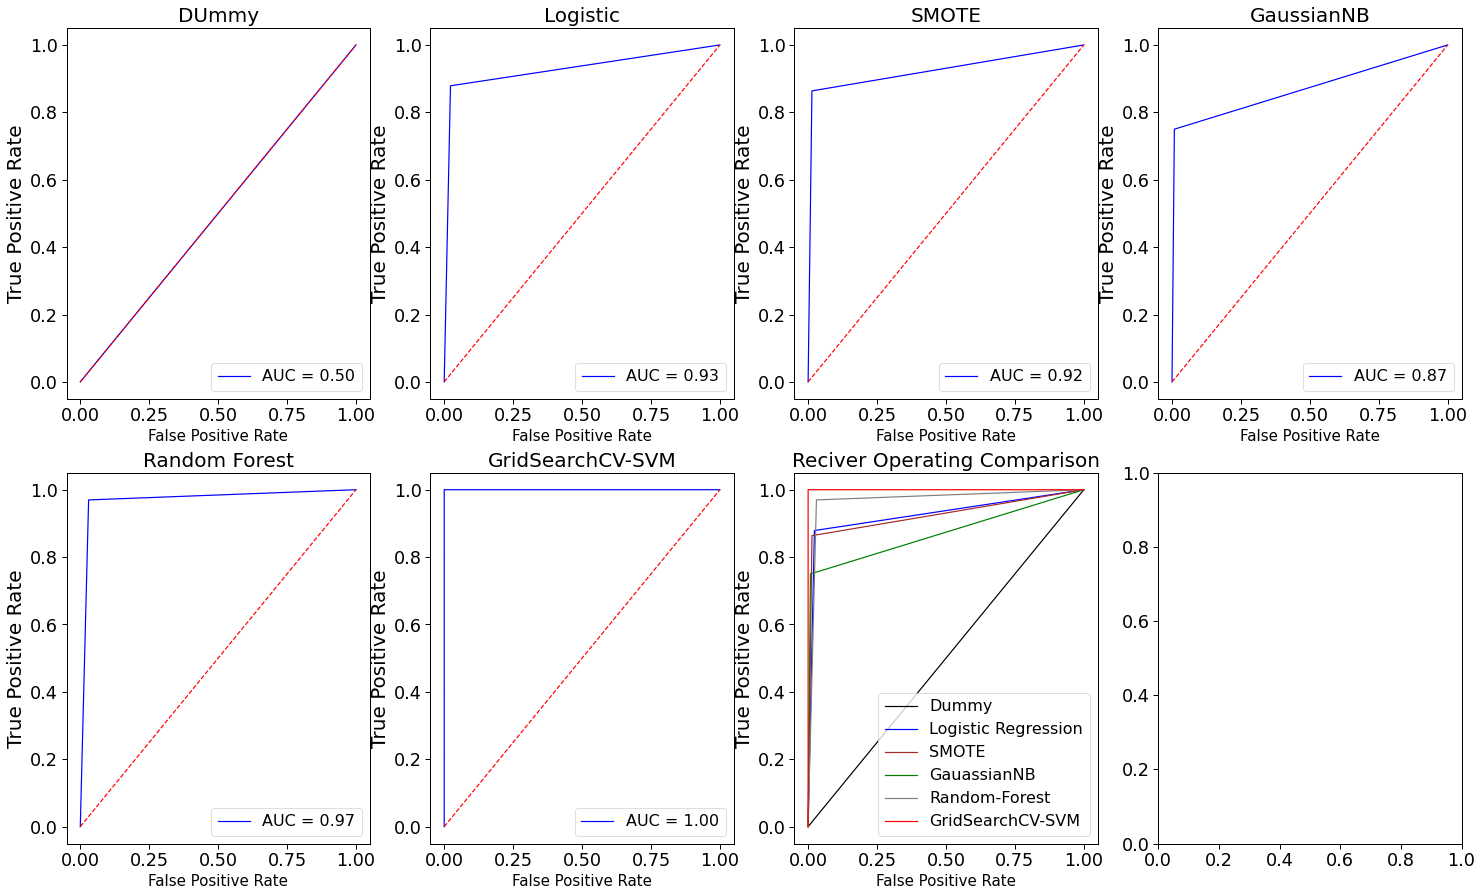

In [97]:
from sklearn import metrics
from sklearn.metrics import roc_curve
fig, ax_arr = plt.subplots(nrows = 2, ncols = 4, figsize = (25,15))

#.......................... Dummy......................

dummy_pred = dummy.predict(X_test)
fprdm , tprdm, thresholddm = metrics.roc_curve(y_test,dummy_pred)
roc_aucxgb = metrics.auc(fprdm, tprdm)

ax_arr[0,0].plot(fprdm, tprdm, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[0,0].plot([0,1], [0,1], 'r--')
ax_arr[0,0].set_title('DUmmy', fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate', fontsize = 20)
ax_arr[0,0].set_xlabel('False Positive Rate', fontsize = 15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size':16})

#.......................... Logistic......................

undersampled_pred = undersampled.predict(X_test)
fprlog , tprlog, thresholdlog = metrics.roc_curve(y_test,undersampled_pred)
roc_aucxgb = metrics.auc(fprlog, tprlog)

ax_arr[0,1].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[0,1].plot([0,1], [0,1], 'r--')
ax_arr[0,1].set_title('Logistic', fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate', fontsize = 20)
ax_arr[0,1].set_xlabel('False Positive Rate', fontsize = 15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size':16})

#.......................... SMOTE......................

smote_pred = smote.predict(X_test1)
fprsmt , tprsmt, thresholdsmote = metrics.roc_curve(y_test,smote_pred)
roc_aucxgb = metrics.auc(fprsmt, tprsmt)

ax_arr[0,2].plot(fprsmt, tprsmt, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[0,2].plot([0,1], [0,1], 'r--')
ax_arr[0,2].set_title('SMOTE', fontsize=20)
ax_arr[0,2].set_ylabel('True Positive Rate', fontsize = 20)
ax_arr[0,2].set_xlabel('False Positive Rate', fontsize = 15)
ax_arr[0,2].legend(loc = 'lower right', prop={'size':16})

#.......................... GaussianNB......................

gnb_pred = gnb_model.predict(X_test)
fprnb , tprnb, thresholdNB = metrics.roc_curve(y_test,gnb_pred)
roc_aucxgb = metrics.auc(fprnb, tprnb)

ax_arr[0,3].plot(fprnb, tprnb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[0,3].plot([0,1], [0,1], 'r--')
ax_arr[0,3].set_title('GaussianNB', fontsize=20)
ax_arr[0,3].set_ylabel('True Positive Rate', fontsize = 20)
ax_arr[0,3].set_xlabel('False Positive Rate', fontsize = 15)
ax_arr[0,3].legend(loc = 'lower right', prop={'size':16})

#..........................Random Forest Classifier......................

randf_pred = randf.predict(X_test1)
fprrf , tprrf, thresholdrf = metrics.roc_curve(y_test,randf_pred)
roc_aucxgb = metrics.auc(fprrf, tprrf)

ax_arr[1,0].plot(fprrf, tprrf, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[1,0].plot([0,1], [0,1], 'r--')
ax_arr[1,0].set_title('Random Forest', fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate', fontsize = 20)
ax_arr[1,0].set_xlabel('False Positive Rate', fontsize = 15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size':16})

#..........................SVM......................

grid_pred = svm_grid.predict(X_test)
fprsvm , tprsvm, thresholdsvm = metrics.roc_curve(y_test,grid_pred)
roc_aucxgb = metrics.auc(fprsvm, tprsvm)

ax_arr[1,1].plot(fprsvm, tprsvm, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[1,1].plot([0,1], [0,1], 'r--')
ax_arr[1,1].set_title('GridSearchCV-SVM', fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate', fontsize = 20)
ax_arr[1,1].set_xlabel('False Positive Rate', fontsize = 15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size':16})

#..........................All......................


ax_arr[1,2].plot(fprdm, tprdm, 'b', label = 'Dummy', color = 'black')
ax_arr[1,2].plot(fprlog, tprlog, 'b', label = 'Logistic Regression', color = 'blue')
ax_arr[1,2].plot(fprsmt, tprsmt, 'b', label = 'SMOTE', color = 'brown')
ax_arr[1,2].plot(fprnb, tprnb, 'b', label = 'GauassianNB', color = 'green')
ax_arr[1,2].plot(fprrf, tprrf, 'b', label = 'Random-Forest', color = 'grey')
ax_arr[1,2].plot(fprsvm, tprsvm, 'b', label = 'GridSearchCV-SVM', color = 'red')

ax_arr[1,2].set_title('Reciver Operating Comparison', fontsize=20)
ax_arr[1,2].set_ylabel('True Positive Rate', fontsize = 20)
ax_arr[1,2].set_xlabel('False Positive Rate', fontsize = 15)
ax_arr[1,2].legend(loc = 'lower right', prop={'size':16})



Overall logistic and random-forest perform well compared to other ML models.